In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')
from HOD import *
from ilc_params import *

sys.path.append('/Users/aleksandra/software/ILC/')
from deCIB_functions import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Settings 

In [3]:
color = "blue"

CIB_model = "websky"
CIB_model2 ="fiona"

In [4]:
path_to_files = "/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-2-23_"+CIB_model+"/ell_dl_"
path_to_files2 ="/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-2-23_"+CIB_model2+"/ell_dl_"
nu_list = 93,100,145,217,225,280,353
nu_list_str = '93,100,145,217,225,280,353'

path_plots = "/Users/aleksandra/Desktop/deCIB_plots/"

In [5]:

def plotfunction(linear=False, **kwargs):   
    plt.figure(figsize=(10,6))
    plt.title(r"", fontsize=30,  **kwargs )
    plt.xlabel(r"$\ell$", size=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)  
    plt.grid(which='both',alpha=0.4)
    plt.yscale("log")
    plt.xscale("log")
    if linear == True:
        plt.yscale("linear")
        plt.xscale("linear")
         

In [6]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
    A_shot_noise = A_shot_noise_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
    A_shot_noise = A_shot_noise_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    A_shot_noise = A_shot_noise_red
    
hod_pdict['galaxy_sample_id']

'blue'

In [7]:
def get_noise_auto_spectra(freq, plot=False):
    planck_noise_channels = {30, 44, 70, 100, 143, 217, 353}
    SO_noise_channels = {93, 145, 225, 280}
    if freq in SO_noise_channels:
        noise_file = open(f'/Users/aleksandra/software/ILC/ilc-moto-2-15_websky/so_noise/noise_{freq}GHz.txt', 'r')
    else:
        noise_file = open(f'/Users/aleksandra/software/ILC/ilc-moto-2-15_websky/planck_noise/noise_{freq}GHz.txt', 'r')
    rows = noise_file.readlines()
    for i, line in enumerate(rows):
        rows[i] = line.lstrip(' ').replace('\n', '').split()
    rows = np.asarray(rows, dtype=np.float32)
    ells_noise, noise = rows
    if plot:
        plt.plot(self.ells, self.ells*(self.ells+1)*noise/(2*np.pi)) #noise needs to be put into Dl for plotting
        plt.title(f'Noise Auto-Spectrum {freq} GHz')
        plt.xlabel(r'$\ell$')
        plt.ylabel(r'$D_{\ell}$ [$\mu K^2$]')
    return ells_noise, noise

In [8]:
get_noise_auto_spectra(143, plot=False)

(array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.998e+03, 9.999e+03,
        1.000e+04], dtype=float32),
 array([9.214677e-05, 9.214692e-05, 9.214722e-05, ..., 1.000000e+09,
        1.000000e+09, 1.000000e+09], dtype=float32))

## kSZ 

In [9]:
# battaglia 12 kSZ theory computation. Patchy is before reionization, the other after reionization; should add these two
CellkSZhomog = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS.d.txt')
CellkSZpatchy = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS_patchy.d.txt')

#get rid of ell*(ell+1)/2pi factors  
ell_ksz = CellkSZhomog[:,0]
cl_kSZ_late = CellkSZhomog[:,1] 
cl_kSZ_patchy = CellkSZpatchy[:,1]
dl_kSZ_theory_battaglia = CellkSZhomog[:,1] + CellkSZpatchy[:,1]
cl_kSZ_theory_battaglia = (CellkSZhomog[:,1] + CellkSZpatchy[:,1]) * 2.0*np.pi/(ell_ksz)/(ell_ksz+1.0)


## tSZ

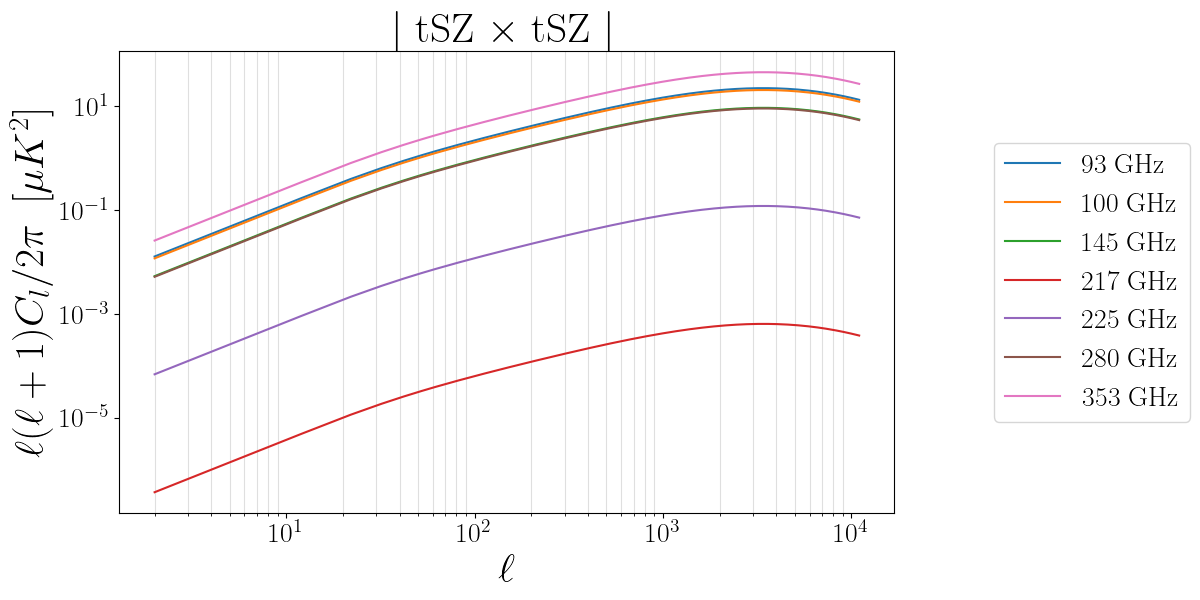

In [10]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    plt.plot(ell, tsz, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.grid()

## CIB 

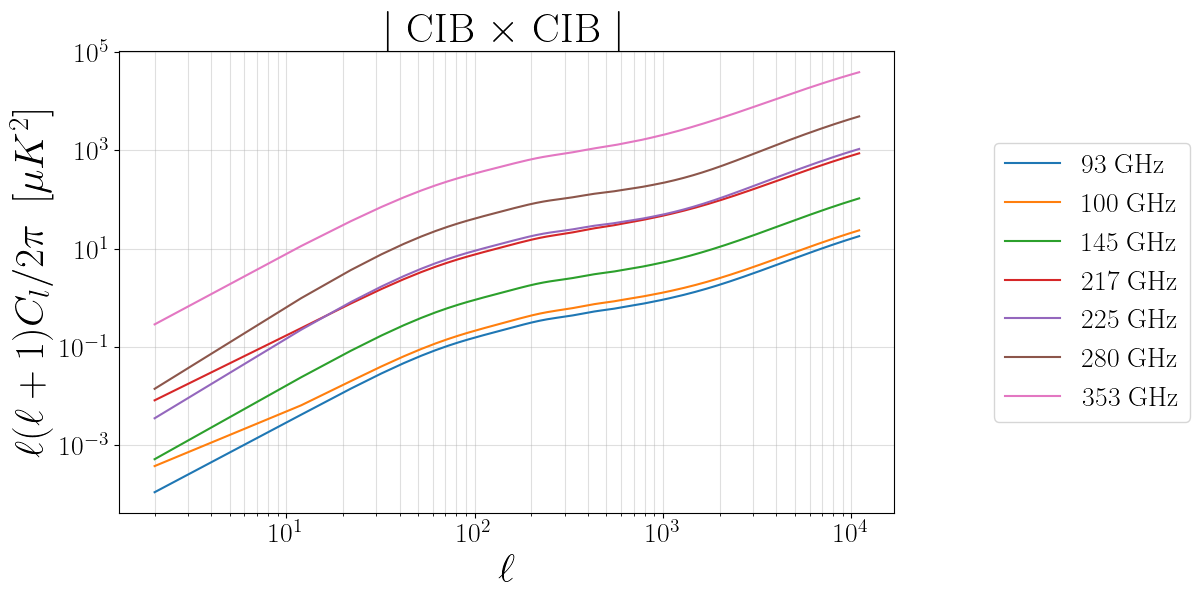

In [11]:
plotfunction()
plt.title("$|$ CIB $\\times$ CIB $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    plt.plot(ell, cib, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x CIB

93
100
145
217
225
280
353


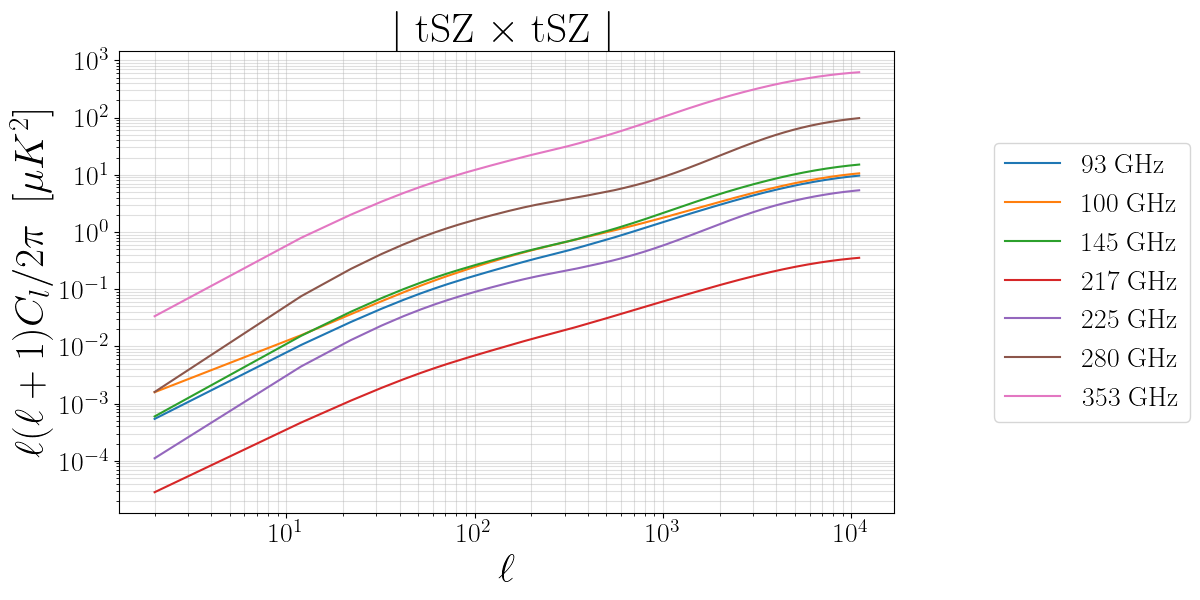

In [12]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    plt.plot(ell, abs(tsz_cib), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x g 

93
100
145
217
225
280
353


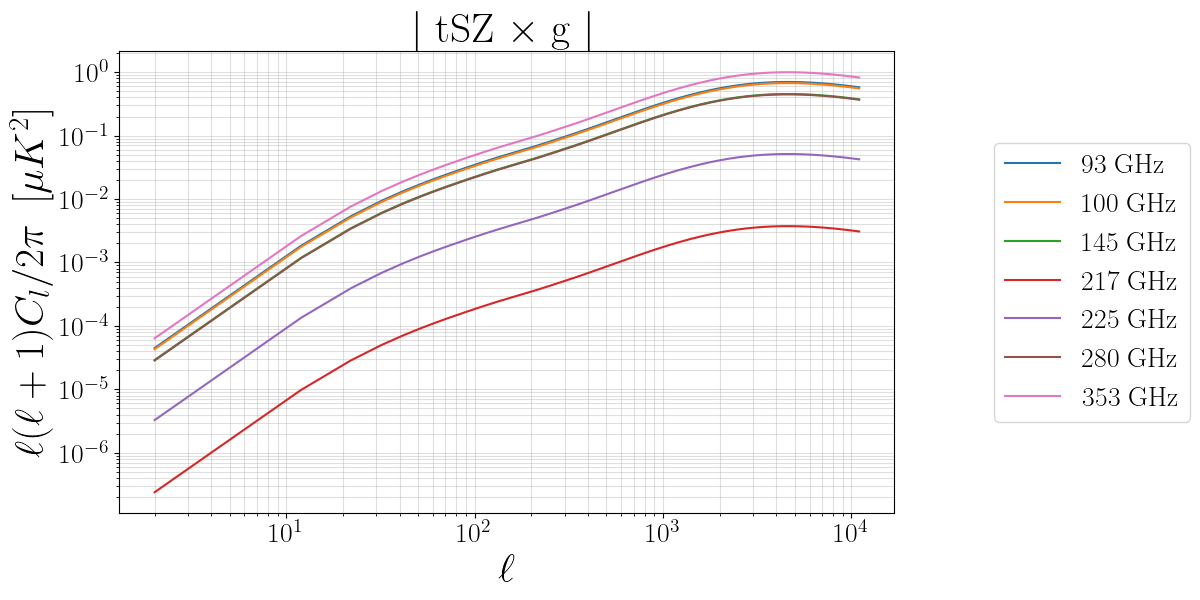

In [13]:
plotfunction()
plt.title("$|$ tSZ $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    plt.plot(ell, abs(tsz_g), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

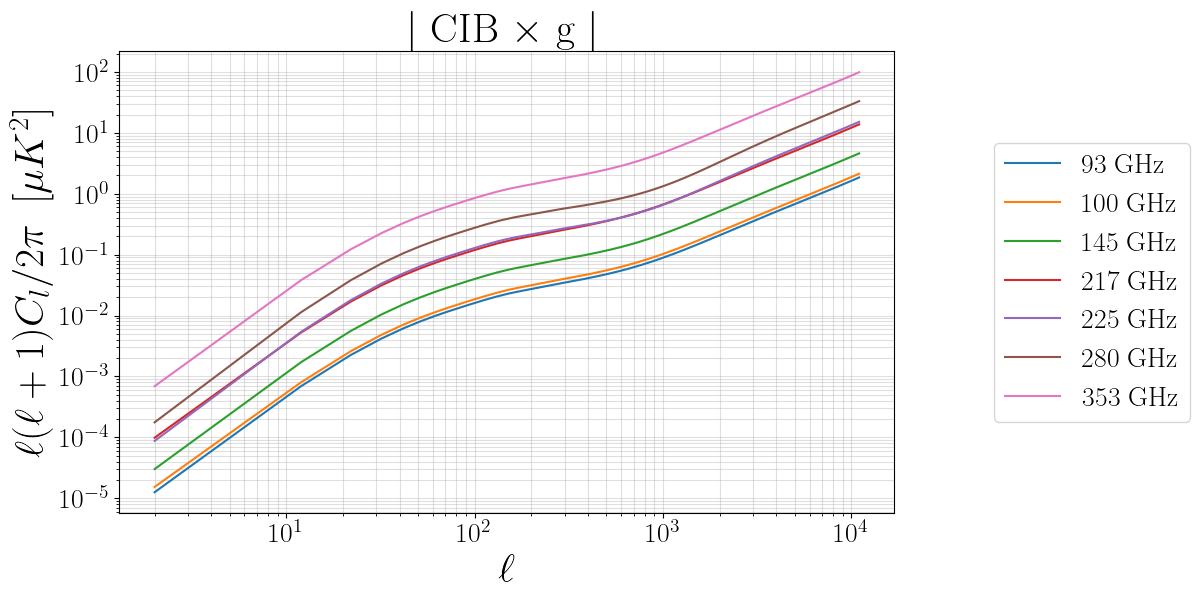

In [14]:
plotfunction()
plt.title("$|$ CIB $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)
#plt.yscale('linear')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    plt.plot(ell, cib_g, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

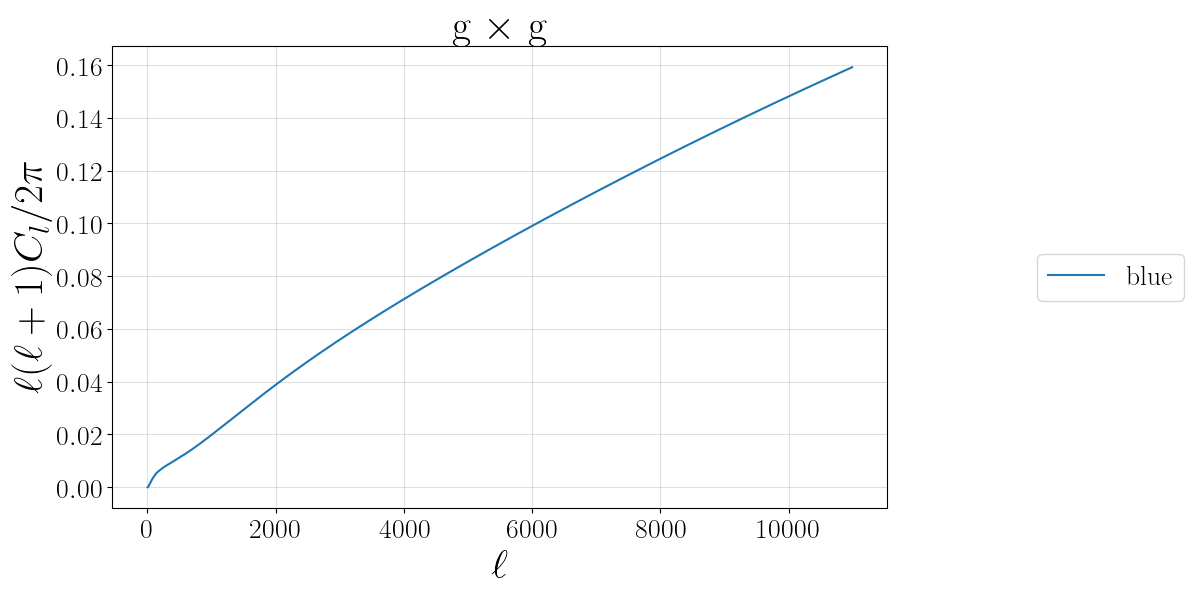

In [15]:
plotfunction()
plt.title(" g $\\times$ g ", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\,$", size=30)
plt.yscale('linear')
plt.xscale('linear')

ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
plt.plot(ell, gg, label = color)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

# Plot everything 

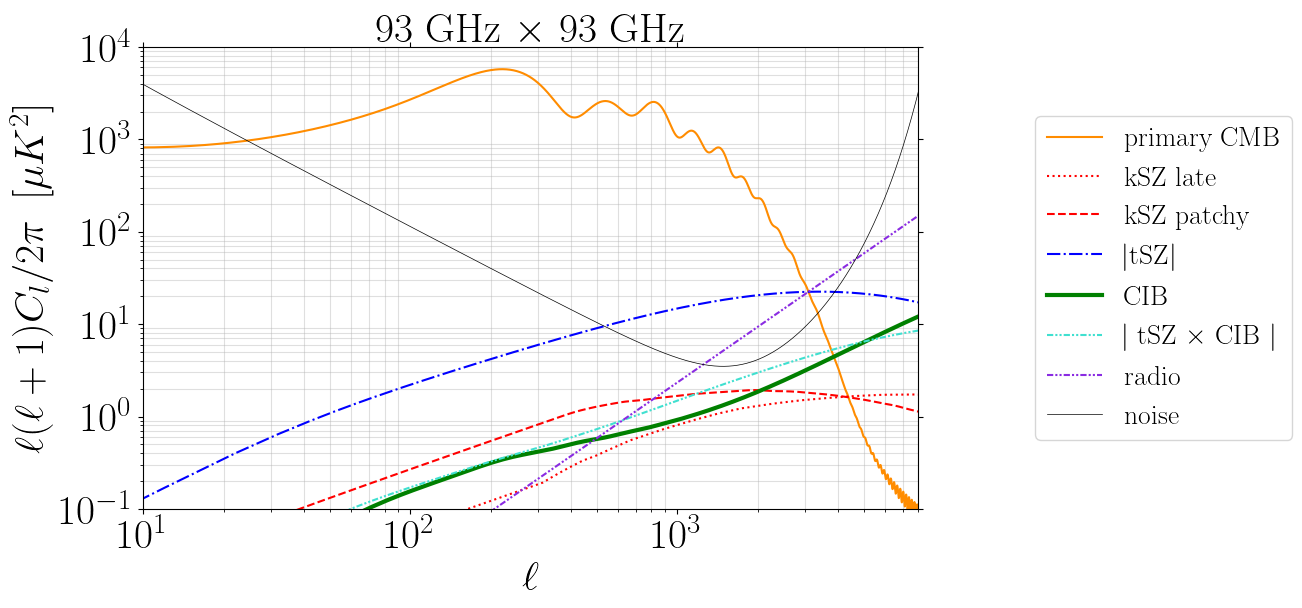

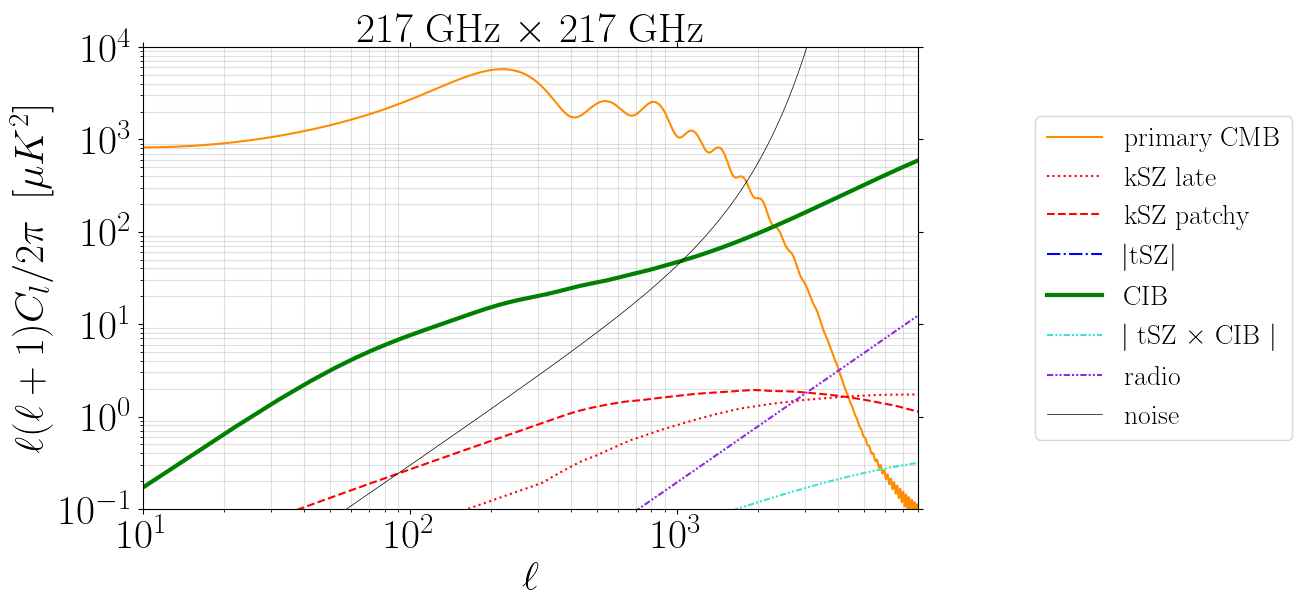

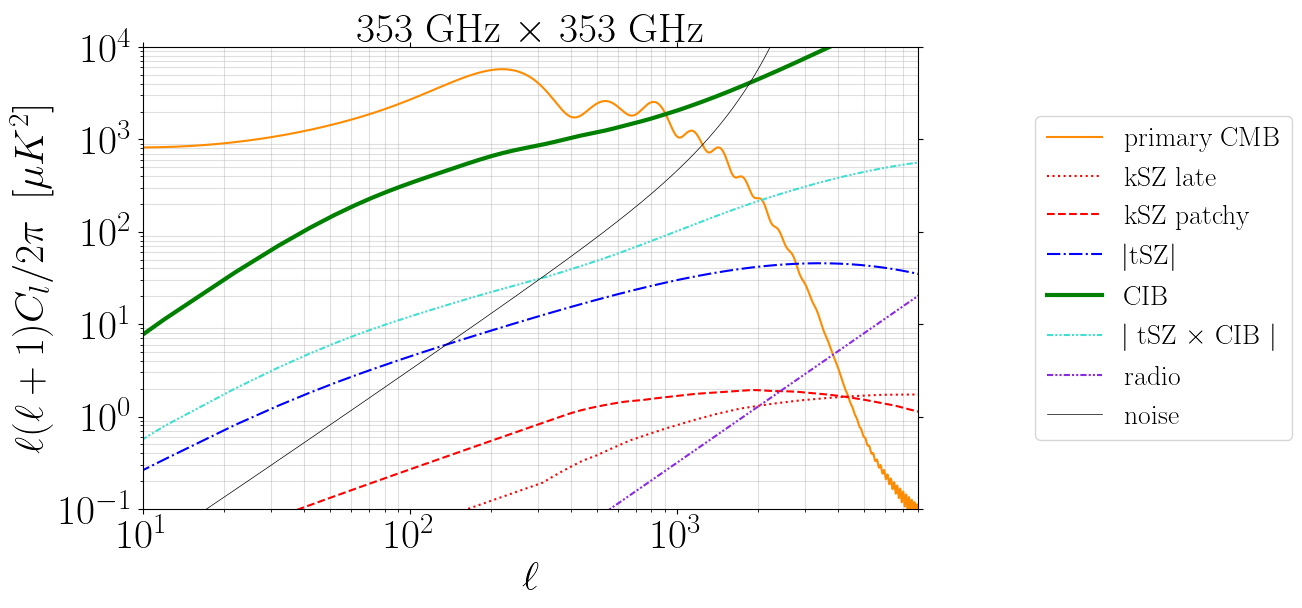

In [16]:
plot_nu =[93,217,353]
for (i,nu) in enumerate(plot_nu):
    plotfunction()
    #plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(plot_nu[i])+' GHz $\\times$ '+str(plot_nu[i])+' GHz', fontsize=30)
    
    ## CMB
    #plt.plot(ell_cmb, factor*cl_tot['tt'],label='total TT')
    ell_cmb, cl_cmb = np.loadtxt(path_to_files + "CMB_lensed.txt")
    plt.plot(ell_cmb, cl_cmb, "-", color="darkorange", label='primary CMB')    
    
    ## kSZ
    plt.plot(ell_ksz, cl_kSZ_late, ":", color = "red", label = "kSZ late")
    plt.plot(ell_ksz, cl_kSZ_patchy,"--",  color = "red", label = "kSZ patchy")

    ## tSZ
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    plt.plot(ell, tsz,"-.",color= "blue", label=r'$|$tSZ$|$')

      
    ## CIB
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    plt.plot(ell, cib, color = "green", linewidth=3, label=r'CIB')
    
    ##tsz x cib
    
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    #ell, cib_tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxtSZ.txt")
    plt.plot(ell, abs(tsz_cib), linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "turquoise", label=r'$|$ tSZ $\times$ CIB $|$')

    
    #radio 
    #ell_radio, radio = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_radioxradio.txt")
    ell_radio = ell
    radio = model_radio(nu,nu, nu0_radio_ghz, beta_radio,A_s, ell0, ell_radio) #for the same frequency nu
    plt.plot(ell_radio, radio,linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "blueviolet", label=r'radio')
    
    #noise
    ell_noise, cl_noise = get_noise_auto_spectra(nu, plot=False)
    dl_2_cl = ell_noise*(ell_noise+1)/2/np.pi
    plt.plot(ell_noise, cl_noise*dl_2_cl, linewidth=0.5, color = "black", label="noise ")
    
    plt.xlim(10, 8.e3)
    plt.ylim(1e-1,1.e4)  
    #plt.xscale("linear")
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30) 
    plt.tick_params(top=True, right=True, left=True, labelleft='on', labelright=False)   
    plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5), fontsize=20)
    plt.grid()
    plt.savefig(path_plots+'all_components_'+str(nu)+'.pdf', bbox_inches = "tight")
    

## Plot cross

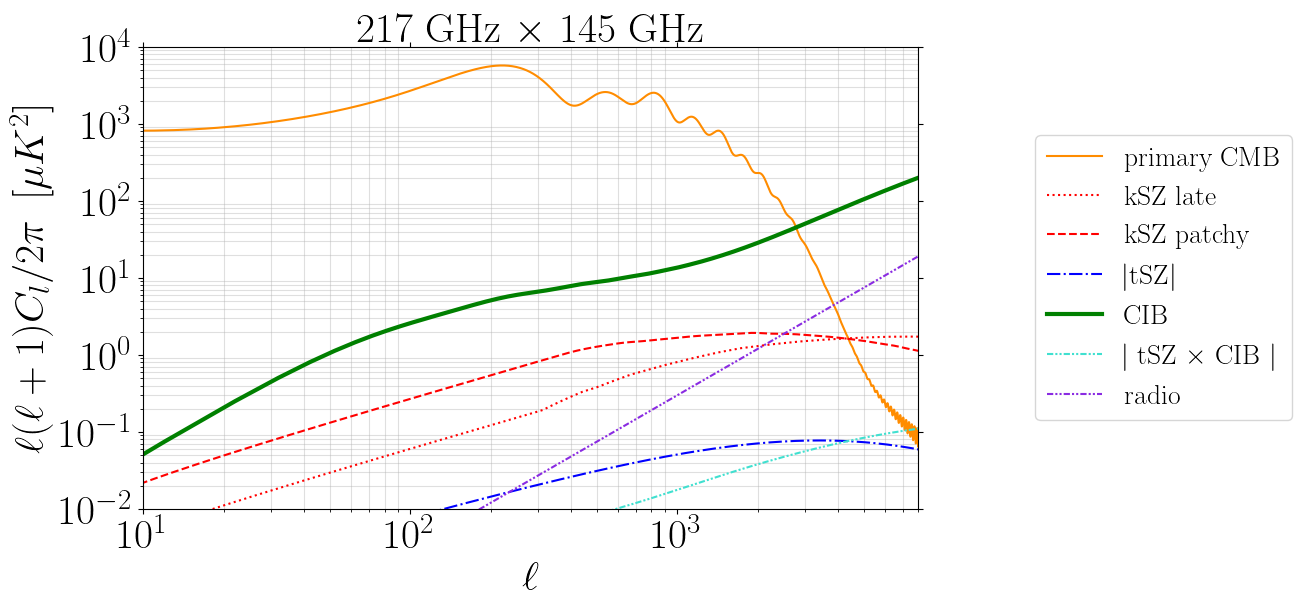

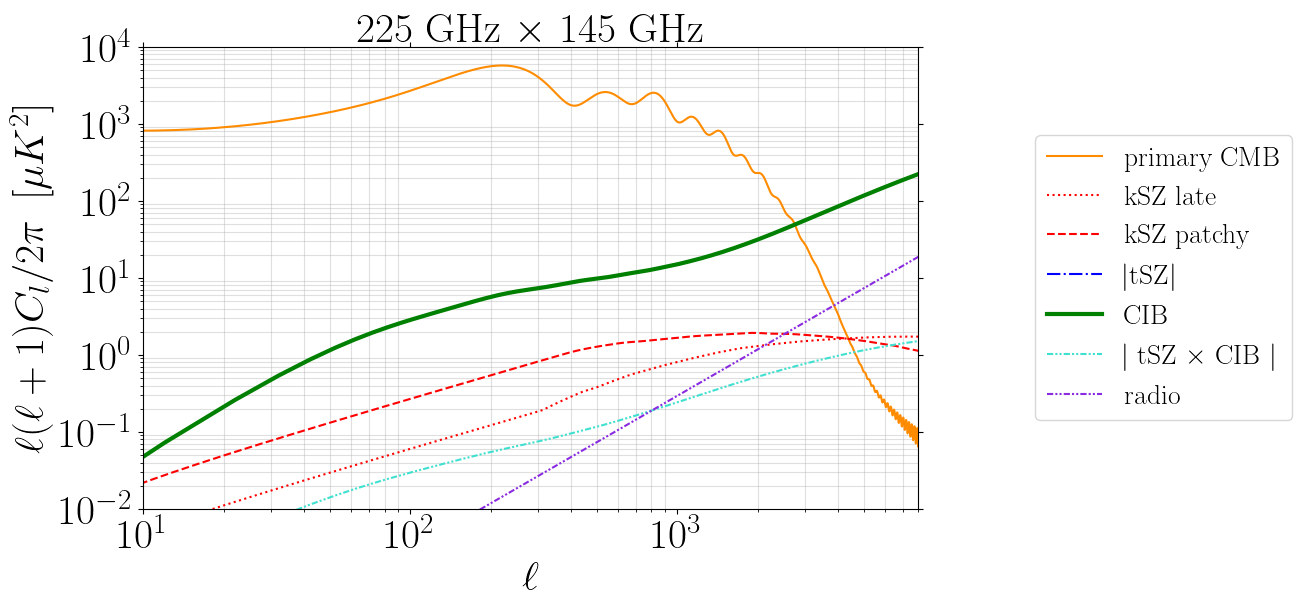

In [17]:
for (i,nu1) in enumerate([217,225]):
    for (j,nu2) in enumerate([145]):
        plotfunction()
        #plt.figure(figsize=(12,8), dpi=250)
        plt.xlabel(r"$\ell$", fontsize=30)
        plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
        plt.title(str(nu1)+' GHz $\\times$ '+str(nu2)+' GHz', fontsize=30)

        ## CMB
        #plt.plot(ell_cmb, factor*cl_tot['tt'],label='total TT')
        ell_cmb, cl_cmb = np.loadtxt(path_to_files + "CMB_lensed.txt")
        plt.plot(ell_cmb, cl_cmb, "-", color="darkorange", label='primary CMB')    

        ## kSZ
        plt.plot(ell_ksz, cl_kSZ_late, ":", color = "red", label = "kSZ late")
        plt.plot(ell_ksz, cl_kSZ_patchy,"--",  color = "red", label = "kSZ patchy")

        ## tSZ
        ell, tsz = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu2)+"_GHz_tSZxtSZ.txt")
        plt.plot(ell, tsz,"-.",color= "blue", label=r'$|$tSZ$|$')


        ## CIB
        ell, cib = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt")
        plt.plot(ell, cib, color = "green", linewidth=3, label=r'CIB')

        ##tsz x cib
        ell, tsz_cib = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu2)+"_GHz_tSZxCIB.txt")
        plt.plot(ell, abs(tsz_cib), linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "turquoise", label=r'$|$ tSZ $\times$ CIB $|$')


        #radio 
        #ell_radio, radio = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_radioxradio.txt")
        ell_radio , radio = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu2)+"_GHz_radioxradio.txt")
        plt.plot(ell_radio, radio,linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "blueviolet", label=r'radio')

        #     #noise
        #     ell_noise, cl_noise = get_noise_auto_spectra(nu, plot=False)
        #     dl_2_cl = ell_noise*(ell_noise+1)/2/np.pi
        #     plt.plot(ell_noise, cl_noise*dl_2_cl, linewidth=0.5, color = "black", label="noise ")

        plt.xlim(10, 8.e3)
        plt.ylim(1e-2,1.e4)  
        #plt.xscale("linear")
        plt.yticks(fontsize=30)
        plt.xticks(fontsize=30) 
        plt.tick_params(top=True, right=True, left=True, labelleft='on', labelright=False)   
        plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5), fontsize=20)
        plt.grid()
        plt.savefig(path_plots+'all_components_'+str(nu1)+'x'+str(nu2)+'.pdf', bbox_inches = "tight")
    

# Correlation coefficients

## CIB x tSZ

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '$\\mathdefault{0}$'),
  Text(2000.0, 0, '$\\mathdefault{2000}$'),
  Text(4000.0, 0, '$\\mathdefault{4000}$'),
  Text(6000.0, 0, '$\\mathdefault{6000}$'),
  Text(8000.0, 0, '$\\mathdefault{8000}$'),
  Text(10000.0, 0, '$\\mathdefault{10000}$')])

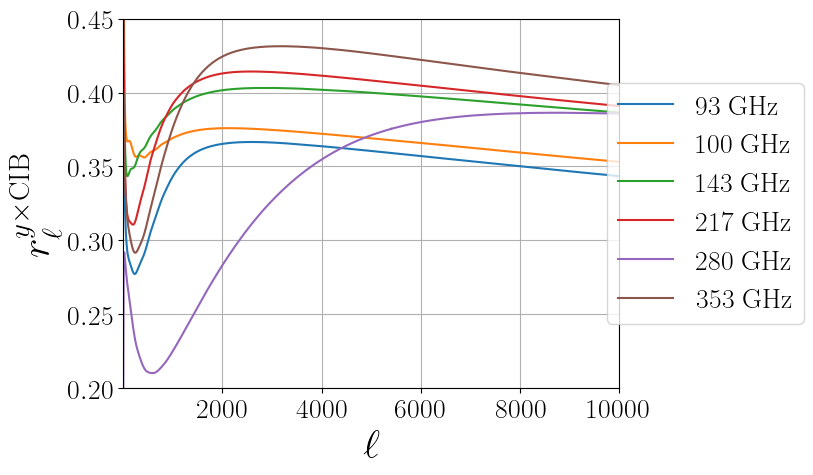

In [49]:
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$r_{\ell}^{ y \times \mathrm{CIB}}$", fontsize=30)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(1, 1e4)
plt.ylim(0.2, 0.45)

for (i,nu) in enumerate(nu_list):
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    
    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    
    corr = abs(tsz_cib) /np.sqrt((cib_full)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.grid()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 

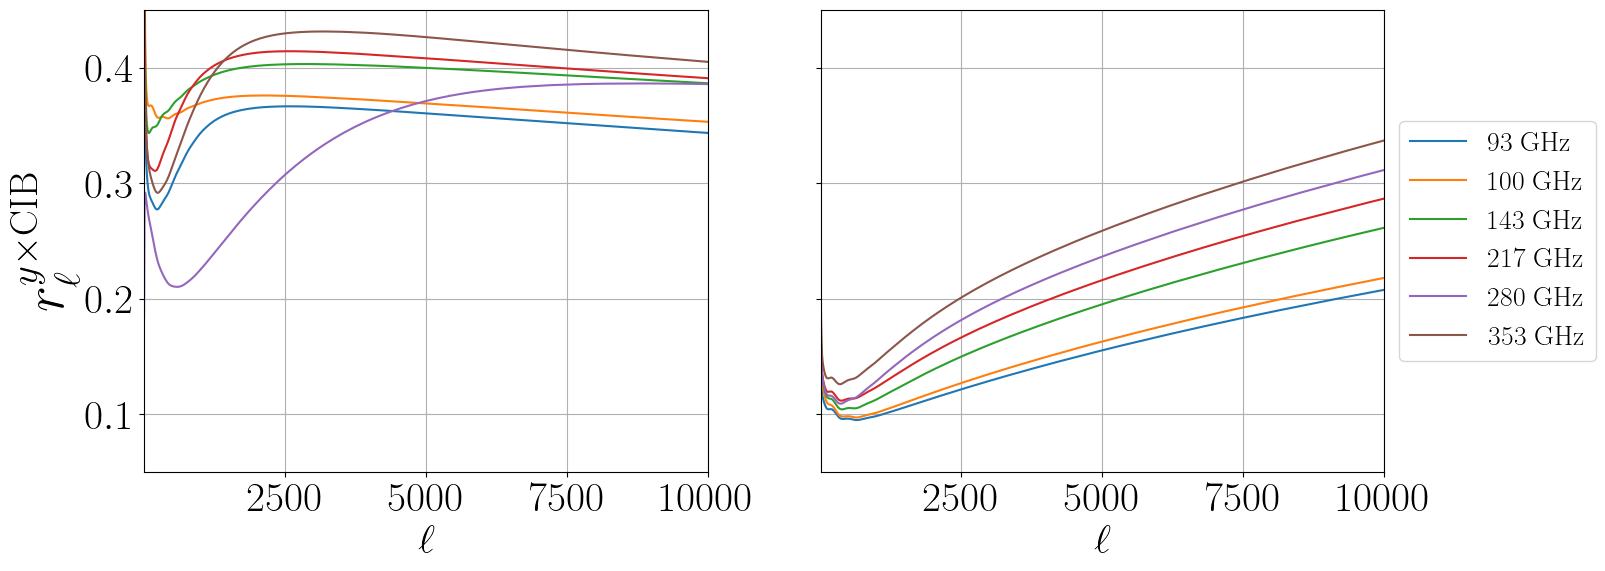

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)


ax1.set_xlabel(r"$\ell$", fontsize=30)
ax2.set_xlabel(r"$\ell$", fontsize=30)

ax1.set_ylabel(r"$r_{\ell}^{ y \times \mathrm{CIB}}$", fontsize=40)

#ax2.set_title(r'P14 $\times$ $\emph{unWISE}_{\mathrm{%.6s}}$' %(color), fontsize=30)


for (i,nu) in enumerate(nu_list):
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    
    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    
    corr = abs(tsz_cib) /np.sqrt((cib_full)*tsz)   
    ax1.plot(ell, corr, label=r'%.1i GHz '%(nu))   
for (i,nu) in enumerate(nu_list):
    ell, tsz_cib = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    ell, tsz = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    ell, cib = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    
    corr = abs(tsz_cib) /np.sqrt((cib_full)*tsz)   
    ax2.plot(ell, corr, label=r'%.1i GHz '%(nu))

    
ax1.set_xlim(8, 10e3)
ax2.set_xlim(8, 10e3)
ax2.set_ylim(0.05,0.45)

ax1.grid(which='both',alpha=1)
ax2.grid(which='both',alpha=1)
ax1.tick_params(axis="x", labelsize=30) 
ax1.tick_params(axis="y", labelsize=30)
ax2.tick_params(axis="x", labelsize=30) 
ax2.tick_params(axis="y", labelsize=30)
ax1.minorticks_off()

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

plt.savefig(path_plots+'cib_compare.pdf', bbox_inches = "tight")

##  tSZ x g 


In [19]:
color = "green"

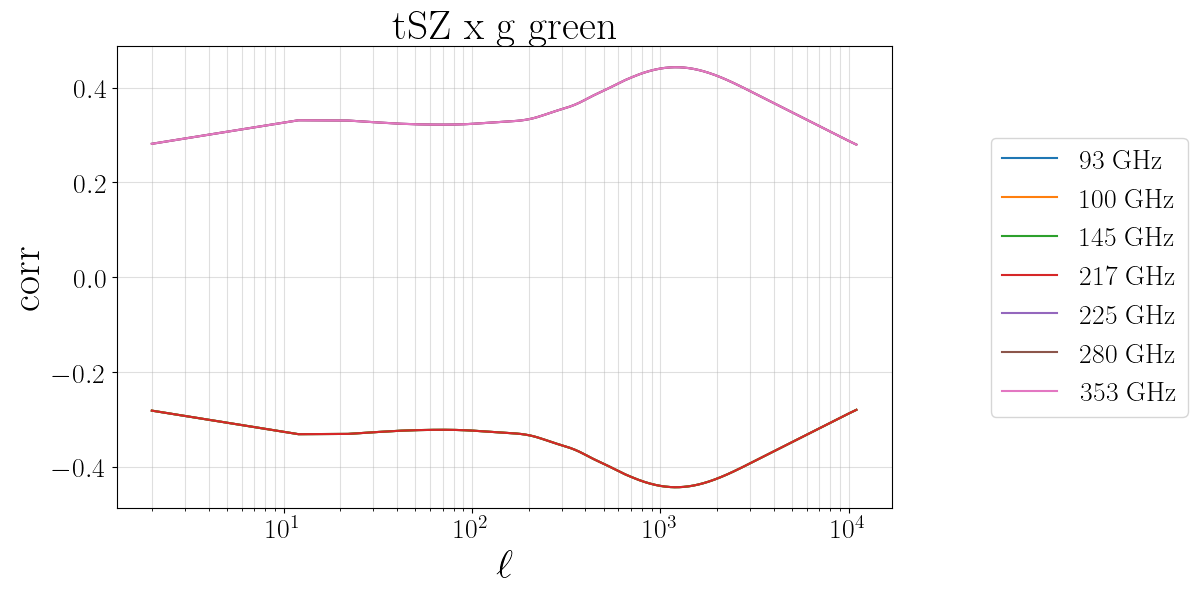

In [20]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g %.6s'%(color), fontsize=30)
plt.xscale('log')
plt.yscale('linear')
for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg

    corr = (tsz_g) /np.sqrt((gg_full)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

In [21]:
A_shot_noise = A_shot_noise_red

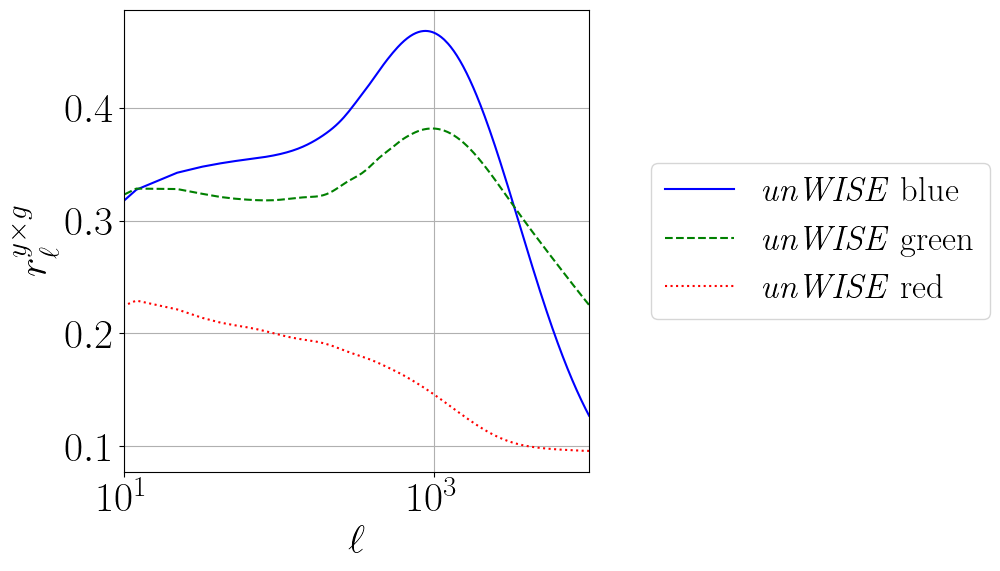

In [22]:
fig, (ax1) = plt.subplots(1, figsize=(6, 6), sharex=True, sharey=True)
ax1.set_xlabel(r"$\ell$", fontsize=30)
ax1.set_ylabel(r"$r_{\ell}^{ y \times g}$", fontsize=30)
#ax1.set_title(r'Compton-$y$ $\times$ $\emph{unWISE}_{\mathrm{%.6s}}$' %(color), fontsize=30)

for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_blue.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_blue_x_blue.txt")
    SN_gg = A_shot_noise_blue * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    corr = (tsz_g) / np.sqrt(gg_full*tsz)  
ax1.plot(ell, abs(corr), color = "blue", label=r"\emph{unWISE} blue")


for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_green.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_green_x_green.txt")
    SN_gg = A_shot_noise_green * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    corr = (tsz_g) / np.sqrt(gg_full*tsz)  
ax1.plot(ell, abs(corr),"--", color = "green", label=r"\emph{unWISE} green")



for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_red.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_red_x_red.txt")
    SN_gg = A_shot_noise_red * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    corr = (tsz_g) / np.sqrt(gg_full*tsz)  
ax1.plot(ell, abs(corr),":", color= "red", label=r"\emph{unWISE} red")
ax1.legend(loc='right',bbox_to_anchor=(1.9, 0.5), fontsize=25)



ax1.set_xlim(10, 1e4)
ax1.set_xscale("log")
ax1.grid(which='both',alpha=1)
ax1.tick_params(axis="x", labelsize=30) 
ax1.tick_params(axis="y", labelsize=30)


plt.savefig(path_plots+'corr_tszg_.pdf', bbox_inches = "tight")

## CIB x g 

In [23]:
 A_shot_noise

2.8847554333156522e-06

In [24]:
cib_planck_table = {
'93':0.10, 
'100':    0.15, 
'143':    1.2, 
 '145':   1.31, 
 '217':   16,    
 '225':   16, 
 '280':   66.85,  
 '353':   225
}


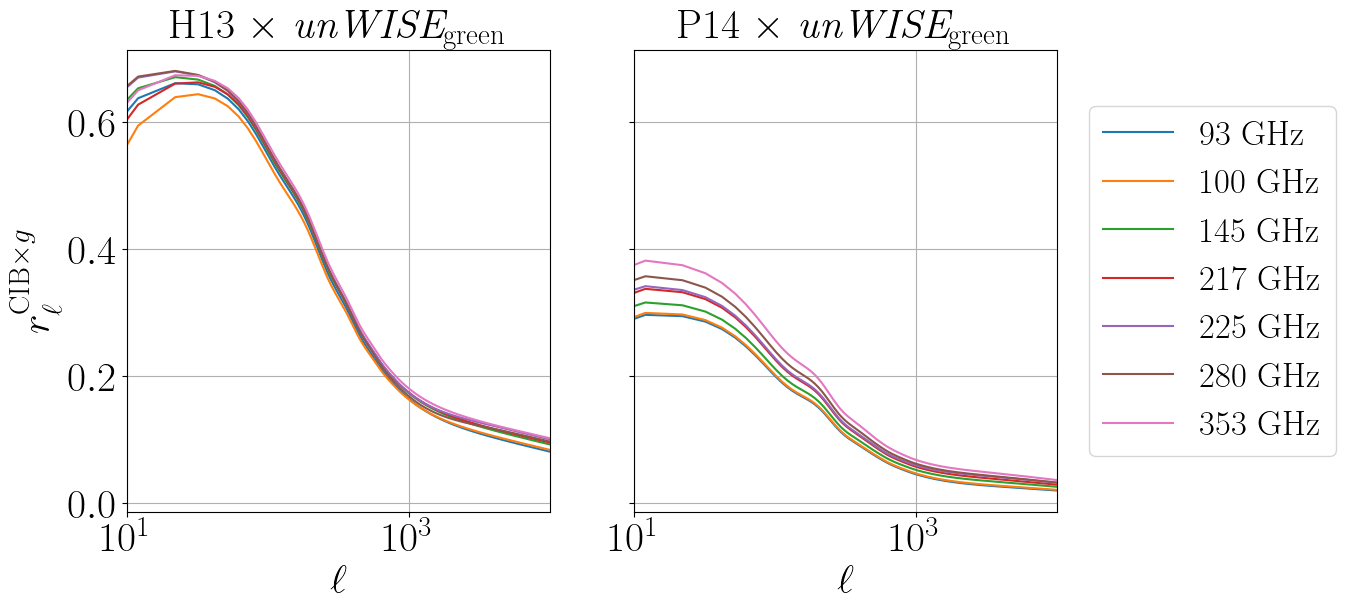

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.set_xlabel(r"$\ell$", fontsize=30)
ax1.set_ylabel(r"$r_{\ell}^{\mathrm{CIB} \times g}$", fontsize=30)
ax1.set_title(r'H13 $\times$ $\emph{unWISE}_{\mathrm{%.6s}}$' %(color), fontsize=30)
ax2.set_xlabel(r"$\ell$", fontsize=30)
#ax2.set_ylabel(r"$r_{\ell}^{\mathrm{CIB} \times g}$", fontsize=30)
ax2.set_title(r'P14 $\times$ $\emph{unWISE}_{\mathrm{%.6s}}$' %(color), fontsize=30)


for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    ell2, cib_g2 = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell2, cib2 = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    #print("gg , shot noise % = ", SN_gg /( SN_gg+gg) )

    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    cib_full2 = cib_SN +cib2
    #print("CIB, shot noise % = ", cib_SN/(cib+cib_SN) )
    corr = (cib_g) / np.sqrt(gg_full*cib_full)  
    corr2 = (cib_g2) / np.sqrt(gg_full*cib_full2) 
    ax1.plot(ell, corr, label=r'%.1i GHz '%(nu))
    ax2.plot(ell2, corr2, label=r'%.1i GHz '%(nu))
    ax2.legend(loc='right',bbox_to_anchor=(1.7, 0.5), fontsize=25)

# plt.xscale("log")
# plt.xlim(10, 1e4)

ax1.set_xlim(10, 1e4)
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.grid(which='both',alpha=1)
ax2.grid(which='both',alpha=1)
ax1.tick_params(axis="x", labelsize=30) 
ax1.tick_params(axis="y", labelsize=30)
ax2.tick_params(axis="x", labelsize=30) 
ax2.tick_params(axis="y", labelsize=30)

plt.savefig(path_plots+'corr_cib_'+color+'.pdf', bbox_inches = "tight")

In [26]:
cib_sn = {
'93':    
    {'93x93':0.10,
     '93x100':0.12,
     '93x143':0.34,
     '93x145':0.36,
     '93x217':1.22,
     '93x225': 1.35,
     '93x280':2.46,
     '93x353':4.41,
     '93x545':9.72,
    }, 
'100': 
    {'100x93':0.12,
     '100x100': 0.15,
     '100x143': 0.42,
     '100x145':0.44,
     '100x217': 1.50,
     '100x225':1.66,
     '100x280':3.02,
     '100x353': 5.40,
     '100x545':12,
    },
    
'143':    
    {
     '143x93':0.34,
     '143x100':0.42,
     '143x143': 1.20,
     '143x145':1.25,
     '143x217':4.30,
     '143x225': 4.75,
     '143x280':8.54,
     '143x353':15.00,
     '143x545':35.00,
    },
'145':    
    {
     '145x93': 0.36,
     '145x100':0.44,
     '145x143':1.25,
     '145x145':1.31,
     '145x217':4.49,
     '145x225': 4.96,
     '145x280': 8.92,
     '145x353':15.69,
        '145x545':36.58,
    },
'217':
    {
     '217x93':1.22,
     '217x100':1.50, 
     '217x143': 4.30,
     '217x145':4.49,
     '217x217':16.00,
     '217x225':17.75,
     '217x280':32.59,
     '217x353':59.00,    
    '217x545': 135.0,
    },
'225':
    {
     '225x93': 1.35,
     '225x100':1.66,
     '225x143': 4.75,
     '225x145':4.96,
     '225x217':17.75,
     '225x225': 19.69,
     '225x280':36.18,
     '225x353':65.57 ,
    '225x545':150.50,
    },
'280':
    {
     '280x93':2.46,
     '280x100':3.02,
     '280x143':8.54,
     '280x145':8.92,
     '280x217':32.59,
     '280x225':36.18,
     '280x280':66.85,
     '280x353':122.05,
    '280x545':286.25,
    },
'353':
    {
     '353x93':4.41,
     '353x100':5.40,
     '353x143': 15.00,
     '353x145':15.69,
     '353x217':59,
     '353x225': 65.57,
     '353x280':122.05,
     '353x353':225.00,
        '353x545':543.0,
    },
 
'545':
    {
     '545x93': 9.72,
     '545x100': 12.00,
     '545x143': 35.00,
     '545x145': 36.58,
     '545x217':135,
     '545x225': 150.50,
     '545x280':286.25,
     '545x353': 543,
     '545x545': 1454.00,         
    },
}


## CIB x CIB

### H13/Websky

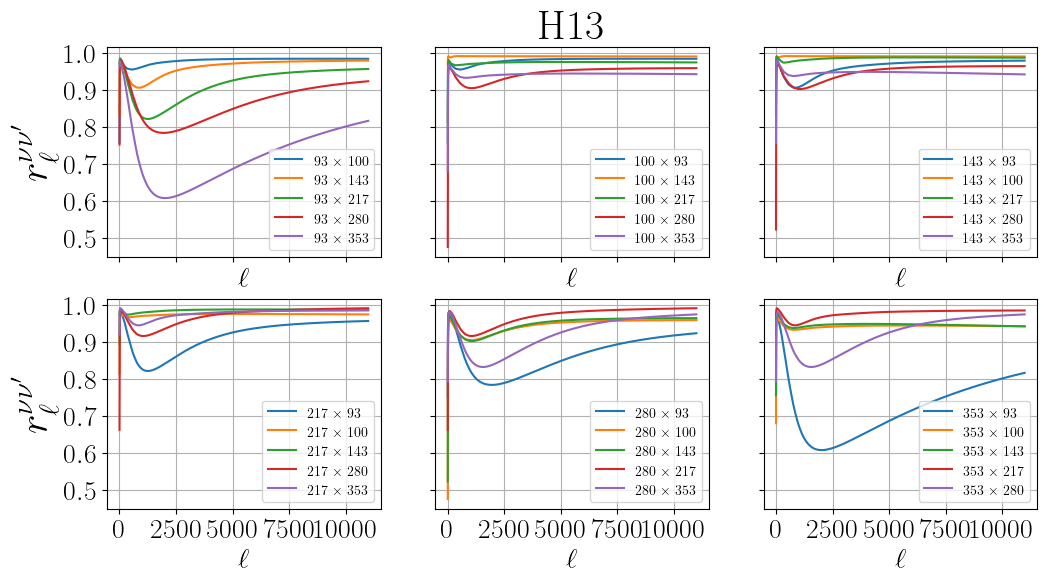

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6), sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.set_ylabel(r"$r_{\ell}^{ \nu  \nu^{\prime}}$", fontsize=30)
ax4.set_ylabel(r"$r_{\ell}^{ \nu  \nu^{\prime}}$", fontsize=30)
ax2.set_title(r"H13", fontsize=30)

nu_list = [100,143,217,353,545]
nu_list = [93,145,225,280]
nu_list = [93,100,143,217,280,353]
for (i,nu1) in enumerate(nu_list):
    ## freq 1 
    ell, cib1 = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu1)+"_GHz_CIBxCIB.txt")
    cl2dl  = ell*(ell+1)/2/np.pi
    sn1 = cl2dl*cib_sn[str(nu1)][str(nu1)+'x'+str(nu1)] / Jysr_to_uKcmb(nu1)**2
    
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            ### frq 2 
            ell, cib2 = np.loadtxt(path_to_files + str(nu2)+"x"+str(nu2)+"_GHz_CIBxCIB.txt")
            sn2 = cl2dl*cib_sn[str(nu2)][str(nu2)+'x'+str(nu2)] / Jysr_to_uKcmb(nu2)**2
            ell, cib12 = np.loadtxt(path_to_files + str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt")
            ## frq 1 x 2
            sn12 = cl2dl*cib_sn[str(nu1)][str(nu1)+'x'+str(nu2)] / Jysr_to_uKcmb(nu1)/ Jysr_to_uKcmb(nu2)
            corr = (cib12+sn12)/np.sqrt((cib1+sn1)*(cib2+sn2))
            plt.axes(axes[i])
            plt.plot(ell, corr, label=r"%.1i  $\times$ %.1i "%(nu1,nu2))#str(mu)+"x"+str(niu))
            plt.xlabel(r'$\ell$', fontsize=20)

            plt.grid()
            plt.yticks(fontsize=20)
            plt.xticks(fontsize=20)      
            plt.legend(loc='lower right', fontsize=10)
            plt.xscale("linear")


plt.savefig(path_plots+'cib_corr_H13.pdf', bbox_inches = "tight")

### Fiona

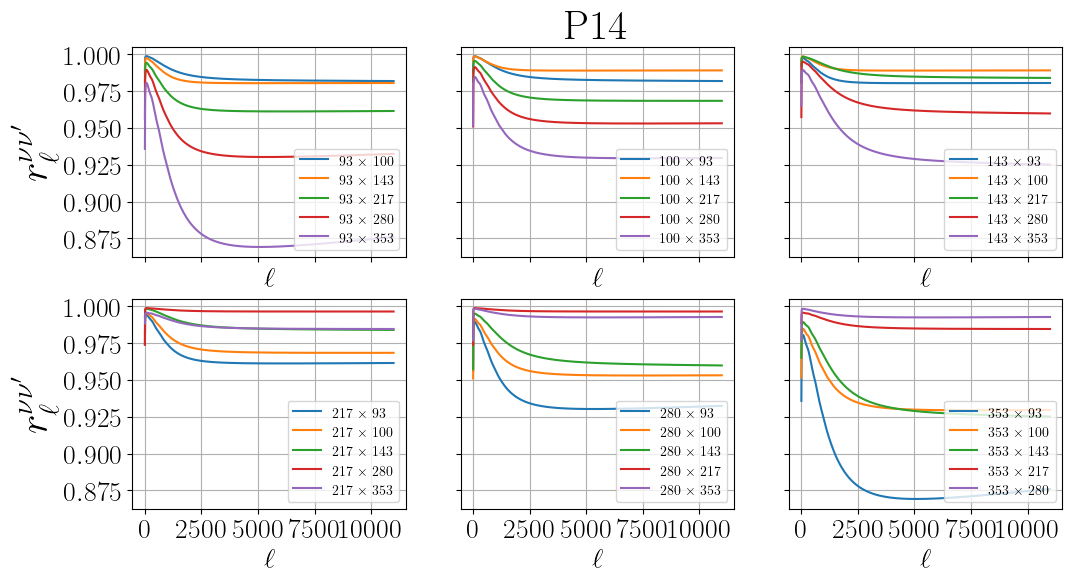

In [35]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6), sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.set_ylabel(r"$r_{\ell}^{ \nu  \nu^{\prime}}$", fontsize=30)
ax2.set_title(r"P14", fontsize=30)
ax4.set_ylabel(r"$r_{\ell}^{ \nu  \nu^{\prime}}$", fontsize=30)


nu_list = [100,143,217,353,545]
nu_list = [93,100,143,217,280,353]

for (i,nu1) in enumerate(nu_list):

    ell, cib1 = np.loadtxt(path_to_files2 + str(nu1)+"x"+str(nu1)+"_GHz_CIBxCIB.txt")
    cl2dl  = ell*(ell+1)/2/np.pi
    sn1 = cl2dl*cib_sn[str(nu1)][str(nu1)+'x'+str(nu1)] / Jysr_to_uKcmb(nu1)**2

    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            #print("nu2:", nu2)
            ell, cib2 = np.loadtxt(path_to_files2 + str(nu2)+"x"+str(nu2)+"_GHz_CIBxCIB.txt")
            sn2 = cl2dl*cib_sn[str(nu2)][str(nu2)+'x'+str(nu2)] / Jysr_to_uKcmb(nu2)**2

            ell, cib12 = np.loadtxt(path_to_files2 + str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt")
            sn12 = cl2dl*cib_sn[str(nu1)][str(nu1)+'x'+str(nu2)] / Jysr_to_uKcmb(nu1)/ Jysr_to_uKcmb(nu2)
            corr = (cib12+sn12)/np.sqrt((cib1+sn1)*(cib2+sn2))
            plt.axes(axes[i])
            plt.plot(ell, corr, label=r"%.1i  $\times$ %.1i "%(nu1,nu2))#str(mu)+"x"+str(niu))
            plt.xlabel(r'$\ell$', fontsize=20)
            plt.grid()
            plt.yticks(fontsize=20)
            plt.xticks(fontsize=20)      
            plt.legend(loc='lower right', fontsize=10)
            plt.xscale("linear")

plt.savefig(path_plots+'cib_corr_P14.pdf', bbox_inches = "tight")

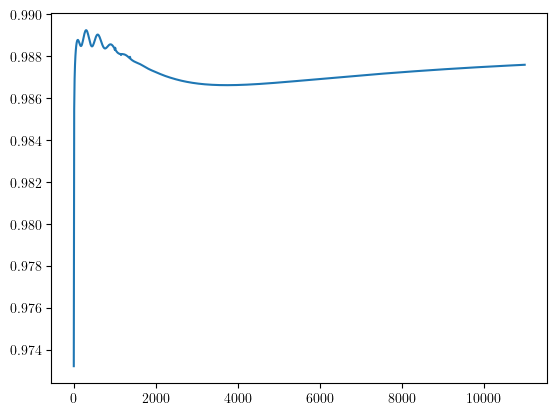

In [29]:
f1 =100
f2=353
ell, cib1 = np.loadtxt(path_to_files2 + str(f1)+"x"+str(f1)+"_GHz_CIBxCIB.txt")
ell, cib2 = np.loadtxt(path_to_files2 + str(f2)+"x"+str(f2)+"_GHz_CIBxCIB.txt")
ell, cib12 = np.loadtxt(path_to_files2 + str(f1)+"x"+str(f2)+"_GHz_CIBxCIB.txt")

corr = (cib12)/np.sqrt((cib1)*(cib2))
plt.plot(ell, corr)

# MBB 

In [69]:
ells_list = np.arange(102,8002,100) #[12, 102, 502, 1002, 2002, 5002, 8002] 

#ells_list = [10, 100, 500]
nu_list = 93,100,143,145,217,225,280,353
ells_list

array([ 102,  202,  302,  402,  502,  602,  702,  802,  902, 1002, 1102,
       1202, 1302, 1402, 1502, 1602, 1702, 1802, 1902, 2002, 2102, 2202,
       2302, 2402, 2502, 2602, 2702, 2802, 2902, 3002, 3102, 3202, 3302,
       3402, 3502, 3602, 3702, 3802, 3902, 4002, 4102, 4202, 4302, 4402,
       4502, 4602, 4702, 4802, 4902, 5002, 5102, 5202, 5302, 5402, 5502,
       5602, 5702, 5802, 5902, 6002, 6102, 6202, 6302, 6402, 6502, 6602,
       6702, 6802, 6902, 7002, 7102, 7202, 7302, 7402, 7502, 7602, 7702,
       7802, 7902])

In [70]:
cib_at_ell_nu_P14 = np.zeros((len(ells_list), len(nu_list)))
print(cib_at_ell_nu_P14.shape)

for (i, L) in enumerate(ells_list):
    for (j,nu) in enumerate(nu_list):
        #print("nu:", nu)
        ell, cib = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
        cl2dl = ell*(ell+1)/2/np.pi
        #print(cib_sn[str(nu)][str(nu)+'x'+str(nu)])
        sn = cl2dl*cib_sn[str(nu)][str(nu)+'x'+str(nu)] / Jysr_to_uKcmb(nu)/ Jysr_to_uKcmb(nu)
        index_L = np.argwhere(ell==L)
        cib_shot_noise = cib #+ sn 
        cib_at_ell_nu_P14[i][j]= cib_shot_noise[index_L] 
        
#print(cib_at_ell_nu_P14)
for i in range(cib_at_ell_nu_P14.shape[0]):
    cib_at_ell_150 = cib_at_ell_nu_P14[i][5]  
    #print(cib_at_ell_150)
    cib_at_ell_nu_P14[i] *= 1/ cib_at_ell_150

(79, 8)


In [95]:
Tdust_CIB = 20.0       #CIB effective dust temperature [K] (Table 9 of http://www.aanda.org/articles/aa/pdf/2014/11/aa22093-13.pdf)
beta_CIB = 1.5

nu_list = 93,100,143,145,217,225,280,353
mbb = cib_spectral_response(nu_list, Tdust_CIB, beta_CIB)
mbb_225 = cib_spectral_response(225, Tdust_CIB, beta_CIB)

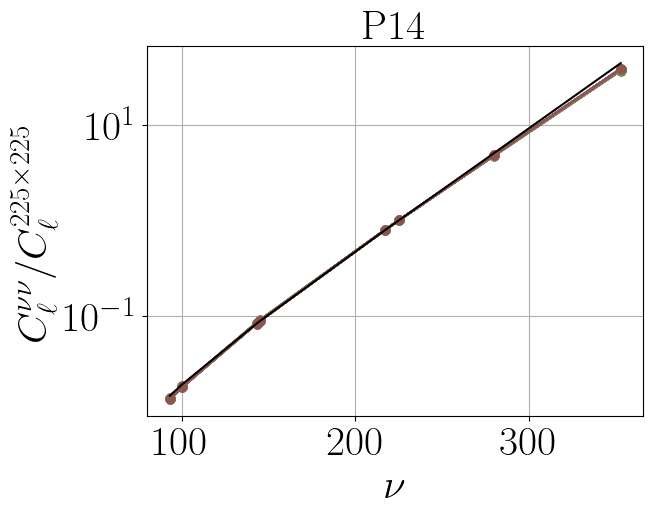

In [96]:
plt.xlabel(r"$\nu $", fontsize=30)
plt.ylabel(r"$ C_{\ell}^{\nu\nu} / C_{\ell}^{225 \times 225}$", fontsize=30)
plt.title(r"P14", fontsize=30)

for (i, L) in enumerate(ells_list):
    cib_at_nu = cib_at_ell_nu_P14[i]
    if (L-2)%1000 ==0:
        plt.plot(nu_list, cib_at_nu, "--o", label ="$\ell = %.3i$"%(L))
    plt.plot(nu_list, cib_at_nu, "-o")
plt.plot(nu_list, (mbb/mbb_225)**2, color = "black")

#plt.legend(loc='right',bbox_to_anchor=(1.7, 0.5), fontsize=25)   
plt.yscale("log")
plt.grid(which='both',alpha=1)
plt.tick_params(axis="x", labelsize=30) 
plt.tick_params(axis="y", labelsize=30)

In [75]:
cib_at_ell_nu_H13 = np.zeros((len(ells_list), len(nu_list)))
print(cib_at_ell_nu_H13.shape)

for (i, L) in enumerate(ells_list):
    for (j,nu) in enumerate(nu_list):
        #print("nu:", nu)
        ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
        cl2dl = ell*(ell+1)/2/np.pi
        #print(cib_sn[str(nu)][str(nu)+'x'+str(nu)])
        sn = cl2dl*cib_sn[str(nu)][str(nu)+'x'+str(nu)] / Jysr_to_uKcmb(nu)/ Jysr_to_uKcmb(nu)
        index_L = np.argwhere(ell==L)
        cib_shot_noise = cib #+ sn 
        cib_at_ell_nu_H13[i][j]= cib_shot_noise[index_L] # swicthc?
#print(cib_at_ell_nu_H13)
  
for i in range(cib_at_ell_nu_H13.shape[0]):
    cib_at_ell_150 = cib_at_ell_nu_H13[i][5]  
    #print(cib_at_ell_150)
    cib_at_ell_nu_H13[i] *= 1/ cib_at_ell_150

(79, 8)


In [79]:
Tdust_CIB = 21.0       #CIB effective dust temperature [K] (Table 9 of http://www.aanda.org/articles/aa/pdf/2014/11/aa22093-13.pdf)
beta_CIB = 1.4 

nu_list = 93,100,143,145,217,225,280,353
mbb = cib_spectral_response(nu_list, Tdust_CIB, beta_CIB)
mbb_225 = cib_spectral_response(225, Tdust_CIB, beta_CIB)

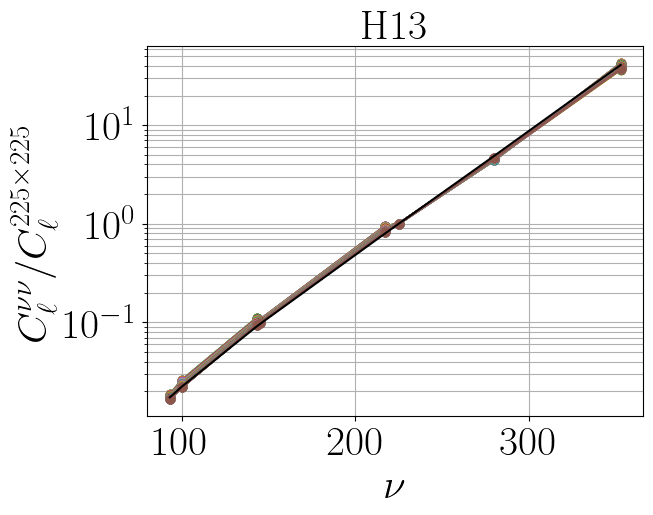

In [80]:
plt.xlabel(r"$\nu $", fontsize=30)
plt.ylabel(r"$ C_{\ell}^{\nu\nu} / C_{\ell}^{225 \times 225}$", fontsize=30)
plt.title(r"H13", fontsize=30)

for (i, L) in enumerate(ells_list):
    cib_at_nu = cib_at_ell_nu_H13[i]   
    if (L-2)%1000 ==0:
        plt.plot(nu_list, cib_at_nu, "--o", label ="$\ell = %.3i$"%(L))
    plt.plot(nu_list, cib_at_nu, "-o")
plt.plot(nu_list, (mbb/mbb_225)**2, color = "black")

#plt.legend(loc='right',bbox_to_anchor=(1.7, 0.5), fontsize=25)   
plt.yscale("log")
plt.grid(which='both',alpha=1)
plt.tick_params(axis="x", labelsize=30) 
plt.tick_params(axis="y", labelsize=30)

In [ ]:
nu_list = 93,100,143,145,217,225,280,353
mbb = cib_spectral_response(nu_list)
mbb_225 = cib_spectral_response(225)

In [ ]:
plt.xlabel(r"$\nu $", fontsize=30)
plt.ylabel(r"$ C_{\ell}^{\nu\nu} / C_{\ell}^{225 \times 225}$", fontsize=30)
plt.title(r"P14", fontsize=30)

for (i, L) in enumerate(ells_list):
    cib_at_nu = cib_at_ell_nu_P14[i]
    if (L-2)%1000 ==0:
        plt.plot(nu_list, cib_at_nu, "--o", label ="$\ell = %.3i$"%(L))
    plt.plot(nu_list, cib_at_nu, "-o")
plt.plot(nu_list, (mbb/mbb_225)**2, color = "black")

#plt.legend(loc='right',bbox_to_anchor=(1.7, 0.5), fontsize=25)   
plt.yscale("log")
plt.grid(which='both',alpha=1)
plt.tick_params(axis="x", labelsize=30) 
plt.tick_params(axis="y", labelsize=30)

# Compare to data 

## CIB x g from Lenz et al

In [ ]:
freq = 353
#Measurements CIB x unWISE /Ola February '23
path_to_data_planckCIB = '/Users/aleksandra/Desktop/data_CIB_Planck/results/'

ell_data, cl_lenz, sigma_lenz = np.loadtxt(path_to_data_planckCIB+"CIB"+str(freq)+"_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
ell_data, cl_planck, sigma_planck = np.loadtxt(path_to_data_planckCIB+"Planck"+str(freq)+"_x_unWISE_"+color+"_MJysr.txt")

ell_class, cib_g_class = np.loadtxt(path_to_files + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_class2, cib_g_class2 = np.loadtxt(path_to_files2 + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")



plt.figure(figsize=(8,6), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=30)
#plt.title(' CIB $\\times$ unWISE  %.5s at %.3i GHz'%( color, freq,), fontsize=30)
plt.title('%.3i GHz $\\times \emph{unWISE}_{\mathrm{%.6s}}$'%(freq,color), fontsize=30)


plt.plot( ell_class, cib_g_class *Jysr_to_uKcmb(freq) , "-", color="orange", label=r'H13 CIB')
plt.plot( ell_class2, cib_g_class2 *Jysr_to_uKcmb(freq) , "--", color="purple", label=r'P14 CIB')

#Lenz data
plt.errorbar(ell_data, cl_lenz*1e6, yerr = sigma_lenz*1e6,  fmt= ".", color = color , capsize=4, label=" \emph{Lenz et. al. }")
if color=="red":
    plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "brown", capsize=4, label=" \emph{Planck} GNILC")
else: 
    plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "light"+color, capsize=4, label=" \emph{Planck} GNILC")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(1e1,7.e3)  
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

plt.grid(which='both',alpha=0.4)
plt.legend(loc='lower right', fontsize=20)

#lenz_cibg_blue353.png
plt.savefig(path_plots+'lenz_cibg_'+color+str(freq)+'.pdf', bbox_inches = "tight")


In [ ]:
freq = 545

#Measurements CIB x unWISE /Ola February '23
path_to_data_planckCIB = '/Users/aleksandra/Desktop/data_CIB_Planck/results/'

ell_data, cl_lenz, sigma_lenz = np.loadtxt(path_to_data_planckCIB+"CIB"+str(freq)+"_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
ell_data, cl_planck, sigma_planck = np.loadtxt(path_to_data_planckCIB+"Planck"+str(freq)+"_x_unWISE_"+color+"_MJysr.txt")

ell_class, cib_g_class = np.loadtxt(path_to_files + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_class2, cib_g_class2 = np.loadtxt(path_to_files2 + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

plt.figure(figsize=(8,6), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=30)
plt.title('%.3i GHz $\\times \emph{unWISE}_{\mathrm{%.6s}}$'%(freq,color), fontsize=30)

plt.plot( ell_class, cib_g_class *Jysr_to_uKcmb(freq) , "-", color="orange", label=r'H13 CIB')
plt.plot( ell_class2, cib_g_class2 *Jysr_to_uKcmb(freq) , "--", color="purple", label=r'P14 CIB')

#Lenz data
plt.errorbar(ell_data, cl_lenz*1e6, yerr = sigma_lenz*1e6,  fmt= ".", color = color , capsize=4, label=" \emph{Lenz et. al. }")
if color=="red":
    plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "brown", capsize=4, label=" \emph{Planck} GNILC")
else: 
    plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "light"+color, capsize=4, label=" \emph{Planck} GNILC")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(1e1,3.e4)  
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

plt.grid(which='both',alpha=0.4)
plt.legend(loc='lower right', fontsize=20)

#lenz_cibg_blue353.png
plt.savefig(path_plots+'lenz_cibg_'+color+str(freq)+'.pdf', bbox_inches = "tight")


## gg HOD 

In [ ]:
from HOD_functions import *
hod_pdict['galaxy_sample_id']


In [ ]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

s_blue =  0.455
s_green =  0.648
s_red = 0.842

n_degsq_blue=3409
n_degsq_green=1846 
n_degsq_red=144
deg2_to_sr = 3282.8

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
    s = s_blue
    A_shot_noise  = A_shot_noise_blue
    ng = (n_degsq_blue*deg2_to_sr) 
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
    s=s_green
    A_shot_noise  = A_shot_noise_green
    ng = (n_degsq_green*deg2_to_sr) 
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")
    s = s_red
    A_shot_noise  = A_shot_noise_red
    ng = (n_degsq_red*deg2_to_sr) 
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov
print(color)
print(hod_pdict['galaxy_sample_id'])
print(A_shot_noise)

ell_pixwind_bin, pixwind_bin = np.loadtxt("/Users/aleksandra/Desktop/HOD_unWISE/pixel_window_bin_nside2048.txt")


In [ ]:

ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")

gg.shape

In [ ]:
Npoints=40

ell_bin_moto,  gg_bin_moto, chi_sq_moto, chi_sq_full = computed_gg_full(ell, gg, A_shot_noise, trans, ell_alex, cl_alex, cov_alex, bpwf_gg, pixwind_bin,ng, Npoints)
ell_bin,  gg_bin, ell_theory, cl_theory, chi_sq, chi_sq_full, gg_1h, gg_2h, gm_1h, gm_2h, mm_1h, mm_2h = fiducial_gg_full(hod_pdict, s, A_shot_noise, trans, ell_alex, cl_alex, cov_alex, bpwf_gg, pixwind_bin, ng,  Npoints=Npoints)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{ gg} $', fontsize=20)
#ax.set_title(r"gg+gm+mm unWISE %.7s" )# "\n" " best-fit HOD params" "\n" "$\\alpha$= %.2f, $\\sigma$= %.2f" "\n" "M1 prime = %.2e, M min = %.2e, M0= %.2e" %(color,p['alpha_s_HOD'], p['sigma_log10M_HOD'],p['M1_prime_HOD'],p['M_min_HOD'],  p['M0_HOD'],))

if color=="red":
    ax.plot(ell_bin_moto,  gg_bin_moto, ".-", color = "brown", label=r'best-fit $C_{\ell}^{gg}$, $\chi^2 = $%.2f'%(chi_sq_moto))
else:
    ax.plot(ell_bin_moto,  gg_bin_moto, ".-", color = "light"+color, label=r'best-fit $C_{\ell}^{gg}$, $\chi^2 = $%.2f'%(chi_sq_moto))

ax.errorbar(ell_alex[1:],  (cl_alex)[1:], yerr= sigma_alex[1:], fmt = ".", color = color, capsize=4, label="data")


ax.axes.set_xlim(80,4000)
#ax.axes.set_ylim(0.02,0.11)
#ax.axes.set_ylim(3e-6,6e-6)

ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
#ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 13})
#ax.set_yscale('log')
ax.grid(which="both", alpha=0.4)

plt.show()

In [ ]:
p_ell = pixwind_bin[1:Npoints]
shot_noise_ng = A_shot_noise*p_ell**(-2) + 1/ng * (1-p_ell**(-2))
shot_noise_ng

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi=150)
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax.set_xlabel(r"$\ell$", fontsize=30)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{ gg} $', fontsize=30)

ax.errorbar(ell_alex[1:Npoints],  1e5 * (cl_alex)[1:Npoints], yerr= 1e5 *sigma_alex[1:Npoints], fmt = ".", color = color, capsize=4, label="data")
if color=="red":
    ax.plot(ell_bin ,1e5*gg_bin, ".-", color = "brown",label=r'best-fit $C_{\ell}^{gg}$')
else: 
    ax.plot(ell_bin ,1e5*gg_bin, ".-", color = "light"+color,label=r'best-fit $C_{\ell}^{gg}$')

if color=="red":
    ax.plot(ell_bin ,1e5*gg_1h, ".--", color = "lightcoral",label=r'best-fit $C_{\ell}^{gg;~1h}$')  
else: 
    ax.plot(ell_bin ,1e5*gg_1h, ".--", color = "light"+color,label=r'best-fit $C_{\ell}^{gg;~1h}$')
#

ax.plot(ell_bin ,1e5*gg_2h, ".:", color = "dark"+color,label=r'best-fit $C_{\ell}^{gg;~2h}$')
ax.plot(ell_bin ,1e5*(2*(5*s-2)*(gm_1h+gm_2h)  + (5*s-2)*(5*s-2)*(mm_1h+mm_2h)), ".-.", color = "black",label=r'best-fit mag lens')
#ax.plot(ell_bin ,1e5*A_shot_noise*np.ones(len(ell_bin)), linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "grey",label=r'shot noise')
ax.plot(ell_bin ,1e5*shot_noise_ng*np.ones(len(ell_bin)), linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "black",label=r'shot noise')

#Shot noise prior 
# if color=="red":
#     ax.plot(ell_bin ,1e5*(10**(np.log10(1/ng)+0.2))*np.ones(len(ell_bin)), linestyle="--", color = "brown", label=r'SN prior')
#     ax.plot(ell_bin ,1e5*(10**(np.log10(1/ng)-0.2))*np.ones(len(ell_bin)), linestyle="--", color = "brown")
# else:
#     ax.plot(ell_bin ,1e5*(10**(np.log10(1/ng)+0.2))*np.ones(len(ell_bin)), linestyle="--", color = "light"+color,label=r' SN prior')
#     ax.plot(ell_bin ,1e5*(10**(np.log10(1/ng)-0.2))*np.ones(len(ell_bin)), linestyle="--", color = "light"+color,)


ax.axes.set_xlim(100,4000)
#ax.axes.set_ylim(-0.01,7.5e-1)
ax.set_yscale('log')
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(loc="lower right",fontsize=10)
ax.legend(loc='right',bbox_to_anchor=(1.5, 0.5), fontsize=20)
  
ax.grid(which="both", alpha=0.4)

ax2.set_xlabel(r"$\ell$", fontsize=30)
ax2.set_ylabel(r'$ 10^5 \times  C_{\ell}^{gg} $', fontsize=30)
ax2.axes.set_xlim(100,4000)

ax2.errorbar(ell_alex[1:Npoints],  1e5*((cl_alex)[1:Npoints] - gg_bin), yerr= 1e5*sigma_alex[1:Npoints], fmt=".", color = color, capsize=4, label="model residual" )

ax2.axes.axhline(0, color='k', lw=0.8, linestyle="--")
ax2.grid(which="both",b=True, alpha=0.4, linestyle="--") 
#ax2.axes.set_ylim(-6e-3,1.2e-2)
ax2.legend(prop={'size': 12}, loc=1, fontsize=20)
ax2.legend(loc='right',bbox_to_anchor=(1.5, 0.5), fontsize=20)
#ax2.set_yscale('log')
ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", labelsize=30)
ax2.tick_params(axis="x", labelsize=30) 
ax2.tick_params(axis="y", labelsize=30)

plt.savefig(path_plots+'gg_'+color+'.pdf', bbox_inches = "tight")


## tSZ 



In [ ]:
# # 2015 Planck y-map paper results
# # ell bin centers
# Planckelleff2015 = [10.0, 13.5, 18.0, 23.5, 30.5, 40, 52.5, 68.5, 89.5, 117, 152.5, 198, 257.5, 335.5, 436.5, 567.5, 738, 959.5, 1247.5]
# # D_ell^yy
# PlanckDellyy2015 = 1.0e-12*np.array([0.00506, 0.00876, 0.01353, 0.02946, 0.02191, 0.02744, 0.04093, 0.04227, 0.06463, 0.10738, 0.12858, 0.15696, 0.21738, 0.28652, 0.36682, 0.42666, 0.53891, 0.71103, 0.82294])
# # statistical error bars
# PlanckDellerrstat2015 = 1.0e-12*np.array([0.00629, 0.00615, 0.00579, 0.00805, 0.00522, 0.00464, 0.00468, 0.00429, 0.00454, 0.00562, 0.00594, 0.00611, 0.00687, 0.00824, 0.00958, 0.01242, 0.01645, 0.02402, 0.04172])
# # foreground marginalization error bars
# PlanckDellerrfore2015 = 1.0e-12*np.array([0.00002, 0.00007, 0.00015, 0.00021, 0.00053, 0.00109, 0.00172, 0.00320, 0.00567, 0.00969, 0.01889, 0.02895, 0.04879, 0.08374, 0.13524, 0.19500, 0.27718, 0.37576, 0.55162])
# # total error bars (assumed add in quadrature)
# PlanckDellerr2015 = np.sqrt(PlanckDellerrfore2015**2 + PlanckDellerrstat2015**2) (edited) 

In [ ]:
# plt.figure( dpi=250)
# plt.ylabel(r"$D_l^{yy} \,\,\,$", size=30)
# plt.ylabel(r"$\ell (\ell+1) C_l^{yy} / 2 \pi \,\,\,$", fontsize=30)
# plt.title('Compton-$y$', fontsize=30)


# #websky
# dl_to_cl1 = ell1*(ell1+1)/2/np.pi
# plt.plot(ell1,1e-12*tsz1,"-", color="red", label=r'Websky original settings')
# #websky with websky cosmo
# dl_to_cl = ell*(ell+1)/2/np.pi
# plt.plot(ell, 1e-12*tsz, ":", label=r'Websky w/ our settings')
# #data from Boris
# plt.plot(ell_ws, ws_tsz, c='r', label = "Websky data", alpha=0.1)

# #PLANCK 2015
# plt.errorbar(Planckelleff2015, PlanckDellyy2015 , yerr = PlanckDellerr2015, fmt=".",  label=r"\emph{Planck} 2015")


# ACTDellyy3000 = 5.29/(-0.957)**2./(2.726e6)**2
# ACTDellyy3000err = 0.66/(-0.957)**2./(2.726e6)**2

# SPTDellyy3000 = 3.42/(-1.044)**2/(2.726e6)**2
# SPTDellyy3000err = 0.54/(-1.044)**2/(2.726e6)**2

# plt.errorbar([3000],[ACTDellyy3000],
#             yerr=[ACTDellyy3000err ],capthick=1,capsize=3,elinewidth=2,\
#              fmt='<',mfc='k',markersize=8,color = 'blue',zorder=100, label="ACT 2020")

# plt.errorbar([3000],[SPTDellyy3000],
#             yerr=[SPTDellyy3000err],capthick=1,capsize=3,elinewidth=1,\
#              fmt='>',mfc='k',markersize=8,color = 'r', label = "SPT 2020")


# #plt.ylim(7.e0, 5.e5)
# plt.xlim(8,2.5e4)
# y_min = 1.e-2
# y_max = 2
# plt.ylim(1e-12*y_min,1e-12*y_max)
# plt.yscale("log")
# plt.xscale("log")
# plt.yticks(fontsize=20)
# plt.xticks(fontsize=20)

# plt.grid(which='both',alpha=0.4)
# plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=15)
# plt.legend(loc='lower right', fontsize=15)



## CIB websky 

In [ ]:
path_ps = "/Users/aleksandra/software/class_sz/sz_auxiliary_files/cib_files/"

# # in MJy2/sr
ell_ws, ws_cib145 = np.loadtxt(path_ps+"cl_cib_cib_145_websky_l_cl_090322.txt").T
ell_ws, ws_cib217 = np.loadtxt(path_ps+"cl_cib_cib_217_websky_l_cl_090322.txt").T
ell_ws, ws_cib353 = np.loadtxt(path_ps+"cl_cib_cib_353_websky_l_cl_090322.txt").T
ell_ws, ws_cib545 = np.loadtxt(path_ps+"cl_cib_cib_545_websky_l_cl_090322.txt").T

path_ps = "/Users/aleksandra/software/ILC/websky_measurements/"
ell_ws, ws_cib217 = np.loadtxt(path_ps+"websky_cib217_anafast_Jysr_nside4096.txt")
ell_ws, ws_cib353 = np.loadtxt(path_ps+"websky_cib353_anafast_Jysr_nside4096.txt")
ell_ws, ws_cib545 = np.loadtxt(path_ps+"websky_cib545_anafast_Jysr_nside4096.txt")
pixwin = np.loadtxt(path_ps+"pixwin_hp_nside4096.txt")

cl2dl_ws = ell_ws*(ell_ws+1)/2/np.pi

In [ ]:
import pandas as pd
file_lenz_cib = "/Users/aleksandra/Desktop/Cl_CIB_T1T2.csv"
df_cib_auto = pd.read_csv(file_lenz_cib , comment='#') 

In [ ]:
# plt.figure(figsize=(8,6), dpi=250)
# plt.xlabel(r"$\ell$", fontsize=30)
# plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy^2/sr]$", fontsize=30)
# #plt.title('CIB models websky ', fontsize=30)

# for (i,nu) in enumerate([217,353,545]):
#     ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
#     plt.plot(ell, cib*Jysr_to_uKcmb(nu)**2, label=r'H13 (this work), %.1i GHz '%(nu)) 
# for (i,nu) in enumerate([217,353,545]):
#     ell_orig, cib_orig = np.loadtxt("/Users/aleksandra/Desktop/CIB_websky_original_class_sz_"+str(nu)+".txt")
#     plt.plot(ell_orig[::2], cib_orig[::2], "o", label=r'WebSky orig., %.1i GHz '%(nu)) 
# # plt.plot(ell_ws, cl2dl_ws*1e12*ws_cib217/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 217")
# # plt.plot(ell_ws, cl2dl_ws*1e12*ws_cib353/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 353")
# # plt.plot(ell_ws, cl2dl_ws*1e12*ws_cib545/pixwin[:len(ws_cib217)]**2, ".", label = "Websky data 545")

# # #lenz et al 
# # plt.errorbar(df_cib_auto['ell'], df_cib_auto['353x353'], yerr=df_cib_auto['d353x353'],ls="None", color="black", capsize=4, label = "Lenz et al 353")
# # plt.errorbar(df_cib_auto['ell'], df_cib_auto['545x545'], yerr=df_cib_auto['d545x545'],ls="None", color="black", capsize=4, label = "Lenz et al 545")

# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(8, 6e3)
# #plt.ylim(3e3,1.e10)  
# plt.yticks(fontsize=30)
# plt.xticks(fontsize=30)
# plt.minorticks_off()
# plt.grid(which='both',alpha=1)
# plt.legend(loc='lower right', fontsize=16)



## CIB Planck

In [ ]:
freq_cib_1 = 353
freq_cib_2 = freq_cib_1

path_to_class = '/Users/aleksandra/software/class_sz/'
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_353 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_353 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [ ]:
freq_cib_1 = 545
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_545 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_545 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [ ]:
freq_cib_1 = 217
freq_cib_2 = freq_cib_1
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
ell_MM20 = L_ref[:,0]
cl_cib_cib_1h_MM20_217 = L_ref[:,1]
L_ref = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq_cib_1))+'x'+str(int(freq_cib_2))+'.txt')
cl_cib_cib_2h_MM20_217 = L_ref[:,1]
cl_to_dl_MM20 = ell_MM20*(ell_MM20+1)/2/np.pi

In [ ]:
# plt.figure(figsize=(8,6), dpi=250)
# plt.xlabel(r"$\ell$", fontsize=30)
# plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy^2/sr]$", fontsize=30)

# for (i,nu) in enumerate([217,353,545]):
#     ell, cib = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
#     plt.plot(ell, cib*Jysr_to_uKcmb(nu)**2, label=r'P14 (this work), %.1i GHz '%(nu))   
#     #dl_to_cl1 = ell1*(ell1+1)/2/np.pi
# plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217),"o", label = "\emph{Planck} 2014, 217 GHz")
# plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353),"o", label = "\emph{Planck} 2014, 353 GHZ")
# plt.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545),"o", label = "\emph{Planck} 2014, 545 GHz")
    

# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(8, 6e3)
# # plt.ylim(3e1,3.e4)  
# plt.minorticks_off()
# plt.yticks(fontsize=30)
# plt.xticks(fontsize=30)

# plt.grid(which='both',alpha=1)
# plt.legend(loc='lower right', fontsize=18)

## combined benchmark P14 + H13

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)


ax1.set_xlabel(r"$\ell$", fontsize=30)
ax2.set_xlabel(r"$\ell$", fontsize=30)
ax1.set_ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy^2/sr]$", fontsize=30)

#ax2.set_title(r'P14 $\times$ $\emph{unWISE}_{\mathrm{%.6s}}$' %(color), fontsize=30)


for (i,nu) in enumerate([217,353,545]):
    ell, cib = np.loadtxt(path_to_files2 + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    ax2.plot(ell, cib*Jysr_to_uKcmb(nu)**2, label=r'P14 (this work), %.1i GHz '%(nu))   

ax2.plot(ell_MM20, (cl_cib_cib_1h_MM20_217+cl_cib_cib_2h_MM20_217),"o", label = "\emph{Planck} 2014, 217 GHz")
ax2.plot(ell_MM20, (cl_cib_cib_1h_MM20_353+cl_cib_cib_2h_MM20_353),"o", label = "\emph{Planck} 2014, 353 GHZ")
ax2.plot(ell_MM20, (cl_cib_cib_1h_MM20_545+cl_cib_cib_2h_MM20_545),"o", label = "\emph{Planck} 2014, 545 GHz")
    
for (i,nu) in enumerate([217,353,545]):
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    ax1.plot(ell, cib*Jysr_to_uKcmb(nu)**2, label=r'H13 (this work), %.1i GHz '%(nu)) 
for (i,nu) in enumerate([217,353,545]):
    ell_orig, cib_orig = np.loadtxt("/Users/aleksandra/Desktop/CIB_websky_original_class_sz_"+str(nu)+".txt")
    ax1.plot(ell_orig[::2], cib_orig[::2], "s", label=r'WebSky orig., %.1i GHz '%(nu)) 

# plt.yscale("linear")
# plt.xscale("log")
# plt.xlim(10, 1e4)

ax1.set_xlim(8, 6e3)
ax2.set_xlim(8, 6e3)
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.grid(which='both',alpha=1)
ax2.grid(which='both',alpha=1)
ax1.tick_params(axis="x", labelsize=30) 
ax1.tick_params(axis="y", labelsize=30)
ax2.tick_params(axis="x", labelsize=30) 
ax2.tick_params(axis="y", labelsize=30)
ax1.minorticks_off()

ax1.legend(loc='lower right', fontsize=16)
ax2.legend(loc='lower right', fontsize=16)

plt.savefig(path_plots+'cib_compare.pdf', bbox_inches = "tight")